Импортируем необходимые библиотеки

In [13]:
import numpy as np
import pandas as pd
import scipy.stats
from math import sqrt

Загрузим данные

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
dataframe = pd.DataFrame(dataframe.to_numpy(), columns=columns)

data = dataframe['education-num']
data.head()

0    13
1     9
2     7
3    13
4    14
Name: education-num, dtype: object

Найдем выборочное среднее

In [4]:
sample_mean = data.mean()
print(sample_mean)

10.08058968058968


Найдем выборочную дисперсию

In [5]:
sample_variance = data.var()
print(sample_variance)

6.618831434569017


Найдем моду

In [7]:
mode = data.mode().tolist()
print(mode)

[9]


Найдем медиану

In [8]:
median = data.median()
print(median)

10.0


Вычислим коэффицент асимметрии

In [23]:
asymmetry_coefficient = scipy.stats.skew(data.to_numpy())
print(asymmetry_coefficient)

-0.311615534986381


Вычислим эксцесс

In [11]:
kurtosis = scipy.stats.kurtosis(data.to_numpy(), fisher=True)
print(kurtosis)

0.6232450120613757


Вычислим доверительный интервал для генерального среднего

In [16]:
sample_std = data.std(ddof=1)
confidence_interval_mean = scipy.stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/sqrt(data.size))
print(confidence_interval_mean)

(10.052645167080065, 10.108534194099295)


Вычислим доверительный интервал для генеральной дисперсии

In [17]:
lower = (data.size - 1) * sample_variance / scipy.stats.chi2.ppf(0.95 / 2, data.size - 1)
upper = (data.size - 1) * sample_variance / scipy.stats.chi2.ppf(0.05 / 2, data.size - 1)
print((lower, upper))

(6.6222210563906145, 6.721693662055809)


Нарисуем гистограмму

array([[<AxesSubplot:title={'center':'education-num'}>]], dtype=object)

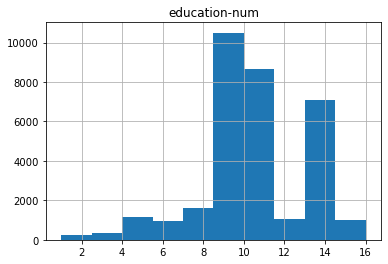

In [22]:
pd.DataFrame.hist(pd.DataFrame(data, dtype=int))